In [2]:
import pandas as pd
import numpy as np
ds = pd.read_csv('India_GDP_Historical_Data.csv') 

In [3]:
ds.shape

(61, 4)

In [4]:
ds.columns

Index(['Year', 'GDP In Billion USD', 'Per Capita in USD', 'Growth in '], dtype='object')

In [5]:
ds.iloc[0:11]

,Year,GDP In Billion USD,Per Capita in USD,Growth in
0,2021,"3,173.40",2277,8.95
1,2020,"2,667.69",1933,-6.60
2,2019,"2,831.55",2072,3.74
3,2018,"2,702.93",1998,6.45
4,2017,"2,651.47",1981,6.80
5,2016,"2,294.80",1733,8.26
6,2015,"2,103.59",1606,8.00
7,2014,"2,039.13",1574,7.41
8,2013,"1,856.72",1450,6.39
9,2012,"1,827.64",1444,5.46


In [6]:
ds.isnull().sum()

Year                  0
GDP In Billion USD    0
Per Capita in USD     0
Growth in             0
dtype: int64

In [7]:
ds.duplicated().sum()

0

In [11]:
ds['Per Capita in USD']

0     2277
1     1933
2     2072
3     1998
4     1981
      ... 
56     119
57     116
58     101
59      90
60      85
Name: Per Capita in USD, Length: 61, dtype: int64

# DATA PREPARATION 

#HERE ALL COLUMNS ARE USEFUL FOR US < SO WE HAVE TO JUST CHANGE THE COLUMN NAMES :

In [12]:
ds.rename(columns={'Year': 'year', 'GDP In Billion USD': 'gdp_in_billion_usd', 'Per Capita in USD': 'per_capita_in_usd','Growth in ' : 'growth_in_percentage'}, inplace=True)
ds.columns

Index(['year', 'gdp_in_billion_usd', 'per_capita_in_usd',
       'growth_in_percentage'],
      dtype='object')

In [40]:
print(ds['gdp_in_billion_usd'].dtype)  # Check type first
print(ds['gdp_in_billion_usd'].apply(type).value_counts()) 
ds['gdp_in_billion_usd'] = pd.to_numeric(ds['gdp_in_billion_usd'].astype(str).str.replace(',', ''), errors='coerce')

float64
gdp_in_billion_usd
<class 'float'>    61
Name: count, dtype: int64


# DATA VISUALIZATION

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as pl
import plotly.graph_objects as go


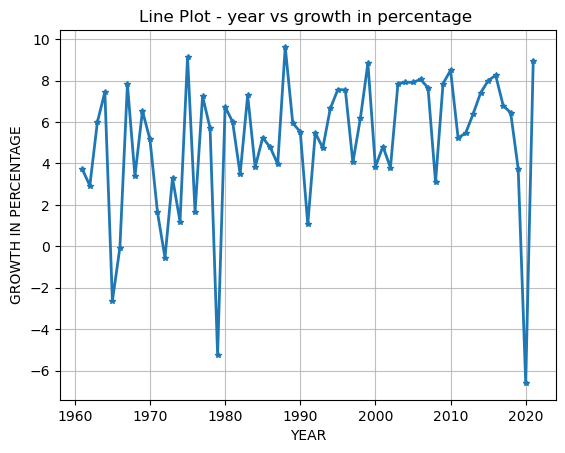

In [44]:
x = ds['year']
y = ds['growth_in_percentage']
plt.plot(x, y, marker='*', linewidth=2, markersize=4)
plt.title('Line Plot - year vs growth in percentage ')
plt.xlabel('YEAR')
plt.ylabel('GROWTH IN PERCENTAGE')
plt.grid(True, alpha=0.8)
plt.show()

# ml model

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = ds[['year', 'gdp_in_billion_usd', 'per_capita_in_usd']]  
y = ds['growth_in_percentage'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)

(48, 3)
(13, 3)
(13,)
(48,)


In [47]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
# Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2score = r2_score(y_test, lr_pred)

In [49]:
#  Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_r2score = r2_score(y_test, dt_pred)


In [50]:
# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2score = r2_score(y_test, rf_pred)

In [51]:
print("R² Scores Comparison :")
print(f"Multiple Linear Regression: {lr_r2score:.3f}")
print(f"Decision Tree: {dt_r2score:.3f}")
print(f"Random Forest: {rf_r2score:.3f}")

best_model = max([('Linear', lr_r2score), ('Decision Tree', dt_r2score), ('Random Forest', rf_r2score)], 
                 key=lambda x: x[1])
print(f"BEST MODEL : {best_model[0]} (R² = {best_model[1]:.3%} )")

R² Scores Comparison :
Multiple Linear Regression: -0.086
Decision Tree: -0.739
Random Forest: -0.400
BEST MODEL : Linear (R² = -8.556% )
